In [1]:
import numpy as np
import pandas as pd
import pickle
import importlib

import matplotlib.pyplot as plt
from matplotlib import style

from lightgbm import LGBMClassifier, plot_importance
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn import metrics

import util

# style.use('dark_background')

In [6]:
importlib.reload(util)

<module 'util' from 'C:\\Users\\joey3\\OneDrive\\CS_DS\\Apnea-ECG\\util.py'>

In [2]:
df = pd.read_csv('../features/feature_train.csv')
train_df = pd.read_csv('../resources/File_train.csv')
feature_col = df.drop(labels=['apn', 'group', 'file'], axis=1).columns

# Model comparison

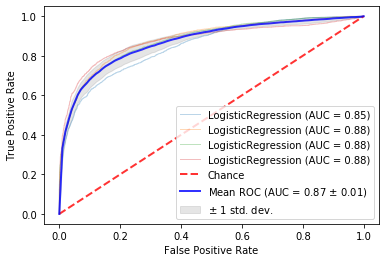

0.8006659708912728


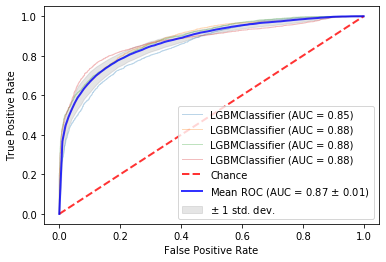

0.8013642941036757


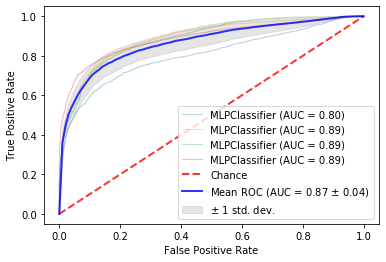

0.8052679473508609


In [8]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1e6)
acc_train, acc_val, res_logreg = util.model_evaluation_CV(
    logreg, df, train_df, feature_col, n=4, plot_roc=True)
print(acc_val)

gbm = LGBMClassifier(
    boosting_type='gbdt', num_leaves=31, max_depth=-1, 
    learning_rate=0.1, n_estimators=100, subsample_for_bin=200000, 
    class_weight=None, min_split_gain=0.0, 
    min_child_weight=0.001, min_child_samples=20, subsample=1.0, 
    subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, 
    random_state=123, n_jobs=-1, silent=True, importance_type='split')
acc_train, acc_val, res_gbm = util.model_evaluation_CV(
    gbm, df, train_df, feature_col, n=4, plot_roc=True)
print(acc_val)

mlp = MLPClassifier(
    hidden_layer_sizes=(5, 5), 
    max_iter=2000,
    early_stopping=True,
    validation_fraction=0.1,
    random_state=123)
acc_train, acc_val, res_mlp = util.model_evaluation_CV(
    mlp, df, train_df, feature_col, n=4, plot_roc=True)
print(acc_val)

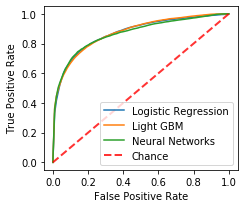

In [9]:
fig, ax = plt.subplots(figsize=(3.5, 3))
ax.plot(res_logreg['mean_fpr'], res_logreg['mean_tpr'], label='Logistic Regression')
ax.plot(res_gbm['mean_fpr'], res_gbm['mean_tpr'], label='Light GBM')
ax.plot(res_mlp['mean_fpr'], res_mlp['mean_tpr'], label='Neural Networks')
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
    label='Chance', alpha=.8)
ax.set(
    xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], 
    xlabel='False Positive Rate', ylabel='True Positive Rate')
# ax.grid(True)
ax.legend(loc="lower right")
plt.tight_layout()
plt.show()
fig.savefig('../archive/Model_ROC.png', dpi=300)

# z_Feature selection
    This leads to overfitting

In [19]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1e6)
features_logreg = util.feature_select(logreg, df, train_df, feature_col, n=4)
print(features_logreg)

Baseline accuracy: 0.801
Accuracy using RFE: 0.804
**********************************
Baseline accuracy: 0.801
Accuracy revoming csi_5min: 0.801
Accuracy revoming nni_20_1min: 0.801
Accuracy revoming rmssd_1min: 0.801
Accuracy revoming max_r_1min: 0.801
Accuracy revoming p75_r_1min: 0.801
Accuracy revoming area_ratio: 0.802
Accuracy revoming sdnn_5min: 0.802
Accuracy revoming median_nni_5min: 0.803
Accuracy revoming f_peak: 0.803
Accuracy revoming csi_1min: 0.803
Accuracy revoming min_hr_5min: 0.803
Accuracy revoming max_hr_1min: 0.803
Accuracy revoming Modified_csi_1min: 0.803
Accuracy revoming cvsd_1min: 0.803
Accuracy revoming mean_nni_5min: 0.804
Accuracy revoming acf1_1min: 0.804
Accuracy revoming sdsd_1min: 0.804
Accuracy revoming area_hf: 0.804
Accuracy revoming area_total: 0.805
Accuracy revoming p25_r_1min: 0.805
Accuracy revoming Modified_csi_5min: 0.805
Accuracy revoming cvnni_1min: 0.805
Accuracy revoming sdnn_1min: 0.805
Accuracy revoming cvnni_5min: 0.805
Accuracy revomin

In [20]:
mlp = MLPClassifier(
    hidden_layer_sizes=(5, 5), 
    max_iter=2000,
    early_stopping=True,
    validation_fraction=0.1,
    random_state=123)
features_mlp = util.feature_select(mlp, df, train_df, feature_col, n=4)
print(features_mlp)

Baseline accuracy: 0.805
Accuracy using RFE: 0.802
**********************************
Baseline accuracy: 0.800
Accuracy revoming csi_5min: 0.801
Accuracy revoming max_hr_1min: 0.802
Accuracy revoming p75_r_1min: 0.811
['nni_20_1min' 'rmssd_1min' 'acf2_1min' 'f_peak' 'max_r_1min' 'sdsd_1min'
 'area_ratio' 'acf1_1min' 'cvsd_1min' 'sdnn_5min' 'min_hr_5min'
 'median_nni_5min' 'csi_1min' 'Modified_csi_1min' 'p25_r_1min' 'area_hf'
 'area_total' 'acf2_5min' 'p25_r_5min' 'sdnn_1min' 'range_nni_1min'
 'cvnni_1min' 'pnni_20_1min' 'mean_nni_1min' 'mean_nni_5min' 'sdsd_5min'
 'Modified_csi_5min' 'cvnni_5min' 'std_hr_5min' 'std_hr_1min' 'std_5min'
 'std_1min' 'rmssd_5min' 'range_nni_5min' 'pnni_50_5min' 'pnni_50_1min'
 'pnni_20_5min' 'peak' 'p75_r_5min' 'nni_50_5min' 'nni_50_1min'
 'nni_20_5min' 'min_r_5min' 'min_r_1min' 'min_hr_1min' 'median_nni_1min'
 'mean_r_5min' 'mean_r_1min' 'mean_hr_5min' 'mean_hr_1min' 'md_5min'
 'md_1min' 'max_r_5min' 'max_hr_5min' 'cvsd_5min' 'cvi_5min' 'cvi_1min'
 'area_

# Model evaluation

## MLP

In [13]:
# With all features
scaler = preprocessing.StandardScaler().fit(df[feature_col])
mlp = MLPClassifier(
    hidden_layer_sizes=(5, 5), 
    max_iter=2000,
    early_stopping=True,
    validation_fraction=0.1,
    random_state=123)
mlp.fit(scaler.transform(df[feature_col]), df['apn'])

test_df = pd.read_csv('../resources/File_test.csv')
res_minute = {}
for file in test_df['file']:
    data = pd.read_csv(f'../resources/feature_{file}.csv')
    y_pred = mlp.predict(scaler.transform(data[feature_col]))
    y_true = data['apn']
    
    res_minute[file] = np.vstack((y_pred, y_true))
    test_df.loc[test_df['file'] == file, 'pred'] = util.ecg_diagnose(y_pred)

print(metrics.classification_report(test_df['group'], test_df['pred']))

res_minute = np.hstack(list(res_minute.values()))
print(metrics.classification_report(res_minute[0, :], res_minute[1, :]))

              precision    recall  f1-score   support

           A       0.88      0.88      0.88         8
           B       0.00      0.00      0.00         2
           C       0.50      0.25      0.33         4

    accuracy                           0.57        14
   macro avg       0.46      0.38      0.40        14
weighted avg       0.64      0.57      0.60        14

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      3929
           1       0.86      0.82      0.84      2810

    accuracy                           0.87      6739
   macro avg       0.87      0.87      0.87      6739
weighted avg       0.87      0.87      0.87      6739



In [36]:
# With selected features
scaler = preprocessing.StandardScaler().fit(df[feature_col])
mlp = MLPClassifier(
    hidden_layer_sizes=(5, 5), 
    max_iter=2000,
    early_stopping=True,
    validation_fraction=0.1,
    random_state=123)
mlp.fit(scaler.transform(df[feature_col]), df['apn'])

test_df = pd.read_csv('../resources/File_test.csv')
res_minute = {}
for file in test_df['file']:
    data = pd.read_csv(f'../resources/feature_{file}.csv')
    y_pred = mlp.predict_proba(scaler.transform(data[feature_col]))[:, 1] > 0.66
    y_true = data['apn']
    
    res_minute[file] = np.vstack((y_pred, y_true))
    test_df.loc[test_df['file'] == file, 'pred'] = util.ecg_diagnose(y_pred)

print(metrics.classification_report(test_df['group'], test_df['pred']))

res_minute = np.hstack(list(res_minute.values()))
print(metrics.classification_report(res_minute[0, :], res_minute[1, :]))

              precision    recall  f1-score   support

           A       1.00      0.88      0.93         8
           B       0.25      0.50      0.33         2
           C       0.67      0.50      0.57         4

    accuracy                           0.71        14
   macro avg       0.64      0.62      0.61        14
weighted avg       0.80      0.71      0.74        14

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      4355
           1       0.79      0.89      0.84      2384

    accuracy                           0.88      6739
   macro avg       0.86      0.88      0.87      6739
weighted avg       0.89      0.88      0.88      6739



## Logistic Regression

In [3]:
# With all features
scaler = preprocessing.StandardScaler().fit(df[feature_col])
logreg = LogisticRegression(solver='lbfgs', max_iter=1e6)
logreg.fit(scaler.transform(df[feature_col]), df['apn'])

test_df = pd.read_csv('../resources/File_test.csv')
res_minute = {}
for file in test_df['file']:
    data = pd.read_csv('../resources/feature_' + file + '.csv')
    y_pred = logreg.predict(scaler.transform(data[feature_col]))
    y_true = data['apn']
    
    res_minute[file] = np.vstack((y_pred, y_true))
    test_df.loc[test_df['file'] == file, 'pred'] = util.ecg_diagnose(y_pred)

print(metrics.classification_report(test_df['group'], test_df['pred']))

res_minute = np.hstack(list(res_minute.values()))
print(metrics.classification_report(res_minute[0, :], res_minute[1, :]))

res = {'mdl': logreg, 'scaler': scaler}
with open('../resources/model_logreg.pkl', 'wb') as f:
    pickle.dump(res, f)

              precision    recall  f1-score   support

           A       0.88      0.88      0.88         8
           B       0.20      0.50      0.29         2
           C       1.00      0.25      0.40         4

    accuracy                           0.64        14
   macro avg       0.69      0.54      0.52        14
weighted avg       0.81      0.64      0.66        14

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      4148
           1       0.83      0.86      0.84      2591

    accuracy                           0.88      6739
   macro avg       0.87      0.87      0.87      6739
weighted avg       0.88      0.88      0.88      6739



In [45]:
# With selected features
scaler = preprocessing.StandardScaler().fit(df[feature_col])
logreg = LogisticRegression(solver='lbfgs', max_iter=1e6)
logreg.fit(scaler.transform(df[feature_col]), df['apn'])

test_df = pd.read_csv('../resources/File_test.csv')
res_minute = {}
for file in test_df['file']:
    data = pd.read_csv('../resources/feature_' + file + '.csv')
    y_pred = logreg.predict_proba(scaler.transform(data[feature_col]))[:, 1] > 0.66
    y_true = data['apn']
    
    res_minute[file] = np.vstack((y_pred, y_true))
    test_df.loc[test_df['file'] == file, 'pred'] = util.ecg_diagnose(y_pred)

print(metrics.classification_report(test_df['group'], test_df['pred']))

res_minute = np.hstack(list(res_minute.values()))
print(metrics.classification_report(res_minute[0, :], res_minute[1, :]))

# res = {'mdl': logreg, 'scaler': scaler}
# with open('resources/model_logreg.pkl', 'wb') as f:
#     pickle.dump(res, f)

              precision    recall  f1-score   support

           A       1.00      0.62      0.77         8
           B       0.40      1.00      0.57         2
           C       1.00      1.00      1.00         4

    accuracy                           0.79        14
   macro avg       0.80      0.88      0.78        14
weighted avg       0.91      0.79      0.81        14

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      4581
           1       0.73      0.91      0.81      2158

    accuracy                           0.86      6739
   macro avg       0.84      0.88      0.85      6739
weighted avg       0.88      0.86      0.87      6739



In [5]:
temp_df = test_df.drop(['pos', 'neg'], axis=1).set_index('file')
temp_df.rename(columns={'group': 'True', 'pred': 'Pred'}, inplace=True)
temp_df.replace({'A': 'Severe', 'B': 'Moderate', 'C': 'Safe'}, inplace=True)
temp_df

,True,Pred
file,,
b01,Moderate,Severe
c01,Safe,Moderate
a04,Severe,Severe
a10,Severe,Moderate
a39,Severe,Severe
a20,Severe,Severe
b05,Moderate,Moderate
a24,Severe,Severe
c07,Safe,Moderate


In [34]:
df['apn'].value_counts()

0    16257
1    10583
Name: apn, dtype: int64

In [40]:
temp = np.hstack(list(res_logreg['seg_pred'].values()))
print(metrics.classification_report(temp[0, :], temp[1, :]))

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87     16257
         1.0       0.83      0.73      0.78     10583

    accuracy                           0.84     26840
   macro avg       0.84      0.82      0.82     26840
weighted avg       0.84      0.84      0.83     26840



# z_Optimize threshold for group classification
    This only leads to overfitting!

## MLP

In [24]:
mlp = MLPClassifier(
    hidden_layer_sizes=(5, 5), 
    max_iter=2000,
    early_stopping=True,
    validation_fraction=0.1,
    random_state=123)
acc_train, acc_val, res_mlp = util.model_evaluation_CV(
    mlp, df, train_df, feature_col, n=4, detail_pred=True)
acc_val

0.8052679473508609

In [25]:
thresholds = np.arange(0.2, 0.9, 0.01)
score = []
for threshold in thresholds:
    for key, res in res_mlp['seg_pred'].items():
        # Calculate new prediction based on the new threshold
        y_pred = (res[2, :] > threshold).astype(int)
        
        # Patient group diagnosis
        res_mlp['patient_pred'].loc[key, 'pred'] = util.ecg_diagnose(y_pred)
        
    score.append(metrics.f1_score(
        y_true=res_mlp['patient_pred']['true'], 
        y_pred=res_mlp['patient_pred']['pred'], 
        average='weighted'))

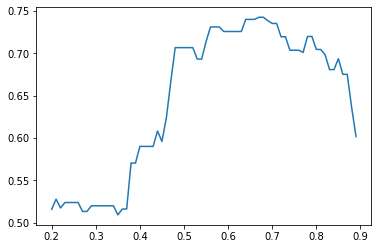

0.6700000000000004


In [26]:
plt.plot(thresholds, score)
plt.show()
threshold_mlp = thresholds[np.argmax(score)]
print(threshold_mlp)

## Logistic Regression

In [27]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1e6)
acc_train, acc_val, res_logreg = util.model_evaluation_CV(
    logreg, df, train_df, feature_col, n=4, detail_pred=True)
acc_val

0.8006659708912728

In [33]:
thresholds = np.arange(0.2, 0.9, 0.01)
score = []
for threshold in thresholds:
    for key, res in res_logreg['seg_pred'].items():
        # Calculate new prediction based on the new threshold
        y_pred = (res[2, :] > threshold).astype(int)
        
        # Patient group diagnosis
        res_logreg['patient_pred'].loc[key, 'pred'] = util.ecg_diagnose(y_pred)
        
    score.append(metrics.f1_score(
        y_true=res_logreg['patient_pred']['true'], 
        y_pred=res_logreg['patient_pred']['pred'], 
        average='weighted',
    ))

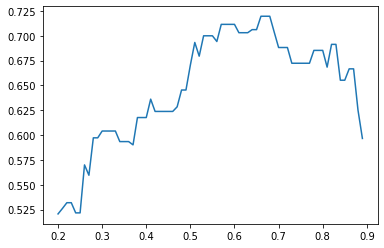

0.6600000000000004


In [34]:
plt.plot(thresholds, score)
plt.show()
threshold_logreg = thresholds[np.argmax(score)]
print(threshold_logreg)